In [1]:
import warnings
warnings.filterwarnings('ignore')
import re

data manipulation


In [2]:
import pandas as pd
from pandarallel import pandarallel
import numpy as np
from datetime import datetime
import calendar

data visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud,  ImageColorGenerator
# file, serialization and deserialization
import os
import missingno as mso
# NLP
# NLP preprocessing
from bs4 import BeautifulSoup
pandarallel.initialize(progress_bar=True)
import string
string.punctuation
import nltk
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from yellowbrick.text import FreqDistVisualizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import set_config
# LR
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
# encoder
from sklearn.feature_extraction.text import CountVectorizer
# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")




INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package omw-1.4 to /home/brandon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/brandon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/home/brandon/Videos/Reviews.csv')

create date column


In [ ]:
df['date'] = pd.to_datetime(df['Time'],unit='s')
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year

Basic Analysis

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'date',
       'Month', 'Year'],
      dtype='object')

Columns datatype: 
 Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                               int64
Summary                           object
Text                              object
date                      datetime64[ns]
Month                              int64
Year                               int64
dtype: object


Text(0.5, 1.0, 'Data Types')

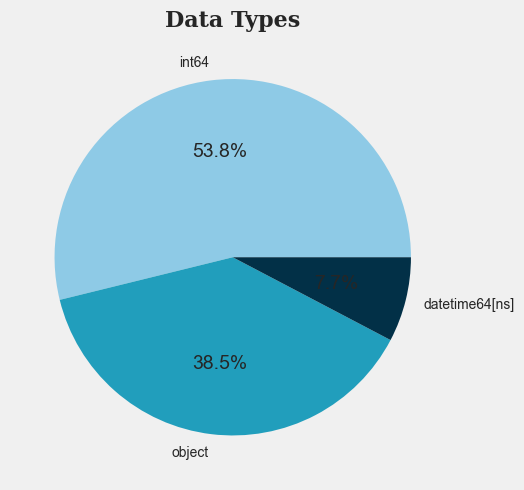

In [ ]:
# print columns datatype
print(f'Columns datatype: \n {df.dtypes}')
# sns pie plot dttypes
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
# y label \
plt.ylabel('')
# set title with custom font
plt.title('Data Types', fontsize=16, fontweight='bold', fontdict={
    'fontsize': 18, 'fontfamily': 'serif', 'fontweight': 'bold'})

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Month,Year
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,6.460292,2010.582860
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,3.406376,1.531855
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,1.000000,1999.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,3.000000,2010.000000
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,7.000000,2011.000000
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,9.000000,2012.000000
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,12.000000,2012.000000


Analyzing text statistics
This Step include:

Word frequency analysis,
Sentence length analysis,
Average word length analysis
First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length.

Number of characters present in each Text (Review)
Here I range the number of characters by 500 chars and so on.

In [ ]:
text_len = df['Text'].groupby(pd.cut(df['Text'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()
text_len.head()

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443


In [ ]:
text_len_50 = text_len[text_len['Text'] > 50]
text_len_50

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443
5,"(2500, 3000]",1556
6,"(3000, 3500]",960
7,"(3500, 4000]",346
8,"(4000, 4500]",260
9,"(4500, 5000]",310


<AxesSubplot: xlabel='Range', ylabel='Text'>

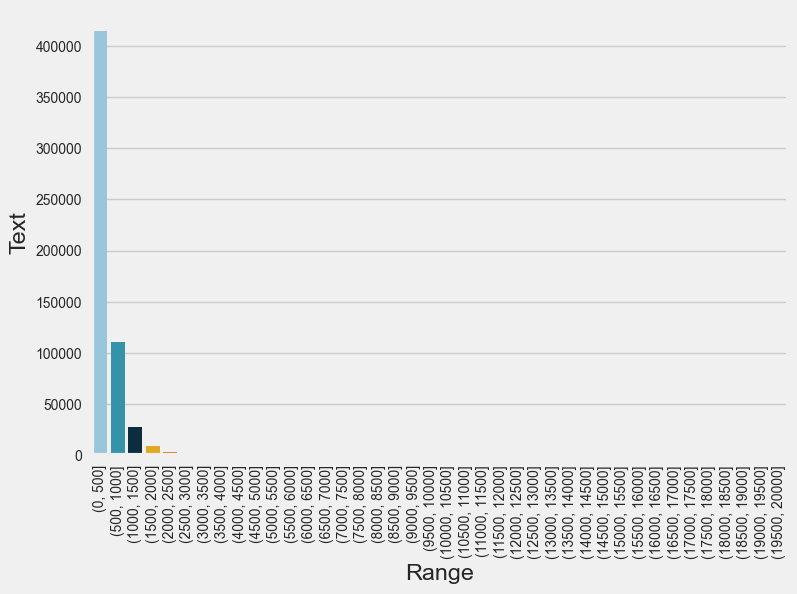

In [ ]:
g = sns.barplot( x=text_len_50['Range'][0:10],y=text_len_50['Text'][0:10],palette=palette)
# g.set_xticks(range(11))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

<AxesSubplot: xlabel='Text', ylabel='Count'>

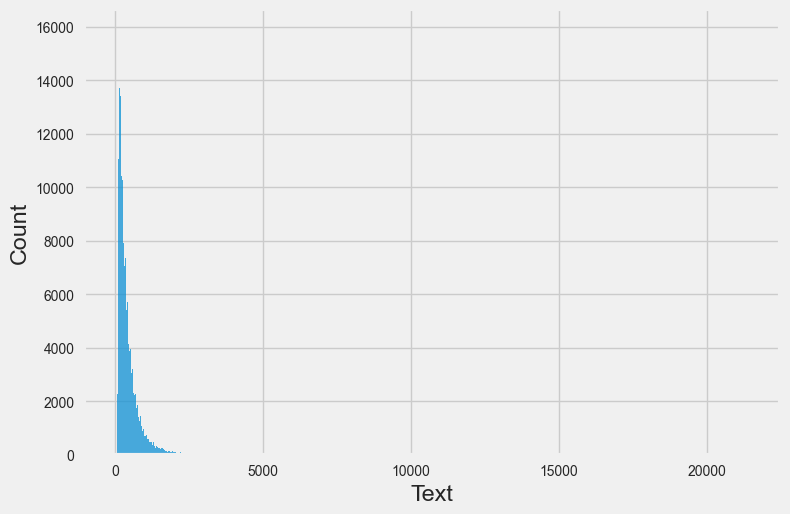

In [ ]:
sns.histplot(data=df, x=df['Text'].str.len(),palette=palette)

In [ ]:
df['Text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()